In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

 Exploring the data and providing descriptive statistics

In [2]:
path_train ="D:\\Machine_Learning_Roadmap\\ATW_LTD\\train.csv"
path_test = "D:\\Machine_Learning_Roadmap\\ATW_LTD\\test.csv"

data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)
data_train.head()

C:\Users\aliaa\AppData\Local\Temp\ipykernel_16216\1570159289.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv(path_train)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


 Performing data visualization. (provide comments on each graph)

In [5]:
# handaling missing value 
data_train = data_train.fillna(data_train.mean(numeric_only=True))
data_train = data_train.fillna(data_train.mode(numeric_only=False).iloc[0])
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

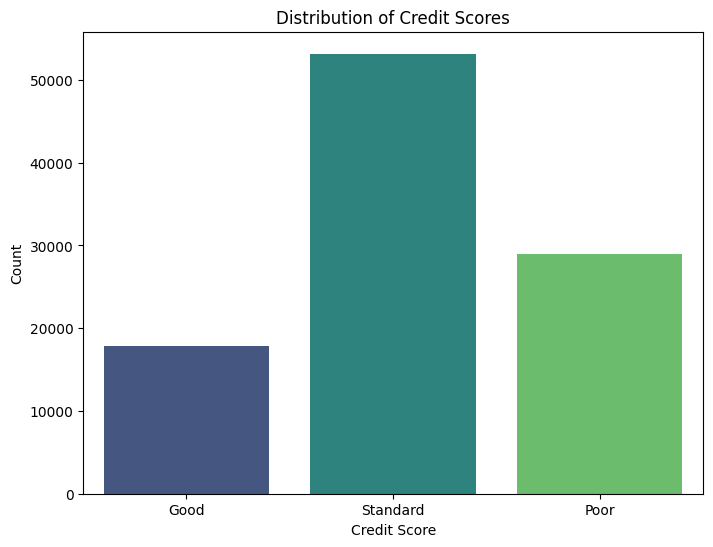

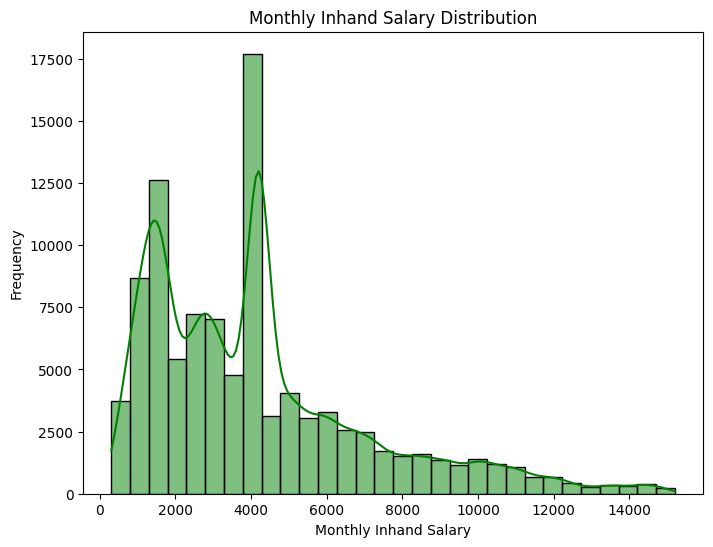

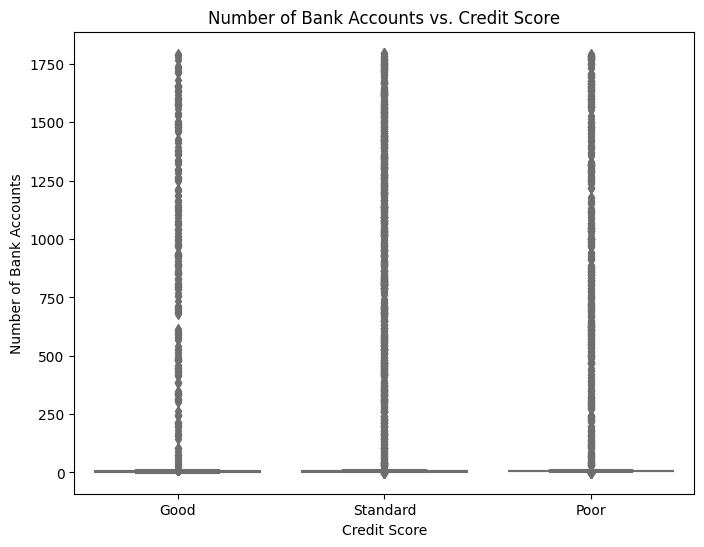

In [6]:
# for visuallization 

# 1_ This shows the distribution of credit score categories, highlighting potential class imbalance.

plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_Score', data=data_train, palette='viridis')
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

#2_ This histogram shows the salary distribution and identifies any significant skewness or outlier
plt.figure(figsize=(8, 6))
sns.histplot(data_train['Monthly_Inhand_Salary'], kde=True, color='green', bins=30)
plt.title("Monthly Inhand Salary Distribution")
plt.xlabel("Monthly Inhand Salary")
plt.ylabel("Frequency")
plt.show()




# 3.This examines the relationship between the number of bank accounts and credit score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data_train, palette='coolwarm')
plt.title("Number of Bank Accounts vs. Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Number of Bank Accounts")
plt.show()



 Applying necessary data transformations and feature engineering. (provide
 justification for each step)
 
    1_ Handling missing values 
    2_ Encoding Categorial data using label encoding 
    3_ Scale Numeric data using standard scaller 

In [8]:
# Fill numeric columns with their mean
data_train.fillna(data_train.mean(numeric_only=True), inplace=True)

# Fill categorical columns with their mode (most frequent value)
for column in data_train.select_dtypes(include=['object']).columns:
    data_train[column].fillna(data_train[column].mode()[0], inplace=True)

data_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,...,3,12062,26.822620,180,1,49.574949,81513,3,42380,0
1,16417,12320,2,84,308,10205,12,6011,4194.170850,3,...,1,12062,31.944960,86,1,49.574949,7661,4,31503,0
2,16428,12320,6,84,0,10205,12,6011,4194.170850,3,...,1,12062,28.609352,184,1,49.574949,82226,5,48639,0
3,16441,12320,0,84,308,10205,12,6011,4194.170850,3,...,1,12062,31.377862,185,1,49.574949,30358,6,11593,0
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,...,1,12062,24.797347,186,1,49.574949,55363,2,51834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6528,364,1009,9,11484,3359.415833,4,...,3,10142,34.663572,307,1,35.104023,69764,1,76392,1
99996,62789,8833,7,6528,364,1009,9,11484,3359.415833,4,...,3,10142,40.565631,308,1,35.104023,65282,2,78093,1
99997,62790,8833,5,6528,364,1009,9,11484,3359.415833,4,...,1,10142,41.255522,309,1,35.104023,37143,1,79793,1
99998,62791,8833,4,6528,364,1009,9,11484,3359.415833,4,...,1,10142,33.638208,310,1,35.104023,39061,4,44642,2


In [7]:
#Handle categorical columns
categorical_columns = data_train.select_dtypes(include=['object']).columns

# Replace missing values and ensure all values are strings
for column in categorical_columns:
    data_train[column] = data_train[column].fillna("Missing").astype(str)

# Apply LabelEncoder
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_train[column] = label_encoders[column].fit_transform(data_train[column])

In [9]:
# Scale numeric features
scaler = StandardScaler()
numeric_columns = data_train.select_dtypes(include=['float64', 'int64']).columns
data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])

data_train[numeric_columns]

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,-8.072221e-01,-0.120024,-0.143150,-0.148934,-1.215932,-0.124193,-1.067562,-0.162960
1,-3.098619e-16,-0.120024,-0.143150,-0.148934,-1.485110,-0.124193,-0.066489,-0.162960
2,-3.098619e-16,-0.120024,-0.143150,-0.148934,-1.215932,-0.124193,-0.718376,-0.162960
3,-3.098619e-16,-0.120024,-0.143150,-0.148934,-1.081342,-0.124193,-0.177318,-0.162960
4,-8.072221e-01,-0.120024,-0.143150,-0.148934,-1.014048,-0.124193,-1.463366,-0.162960
...,...,...,...,...,...,...,...,...
99995,-2.843983e-01,-0.111506,-0.127653,-0.140358,0.129961,-0.129421,0.464817,-0.164702
99996,-2.843983e-01,-0.111506,-0.127653,-0.140358,-0.206512,-0.129421,1.618273,-0.164702
99997,-2.843983e-01,-0.111506,-0.127653,12.127547,0.399139,-0.129421,1.753100,-0.164702
99998,-2.843983e-01,-0.111506,-0.127653,-0.140358,-0.071923,-0.129421,0.264427,-0.164702


Performing feature selection to select most related features.

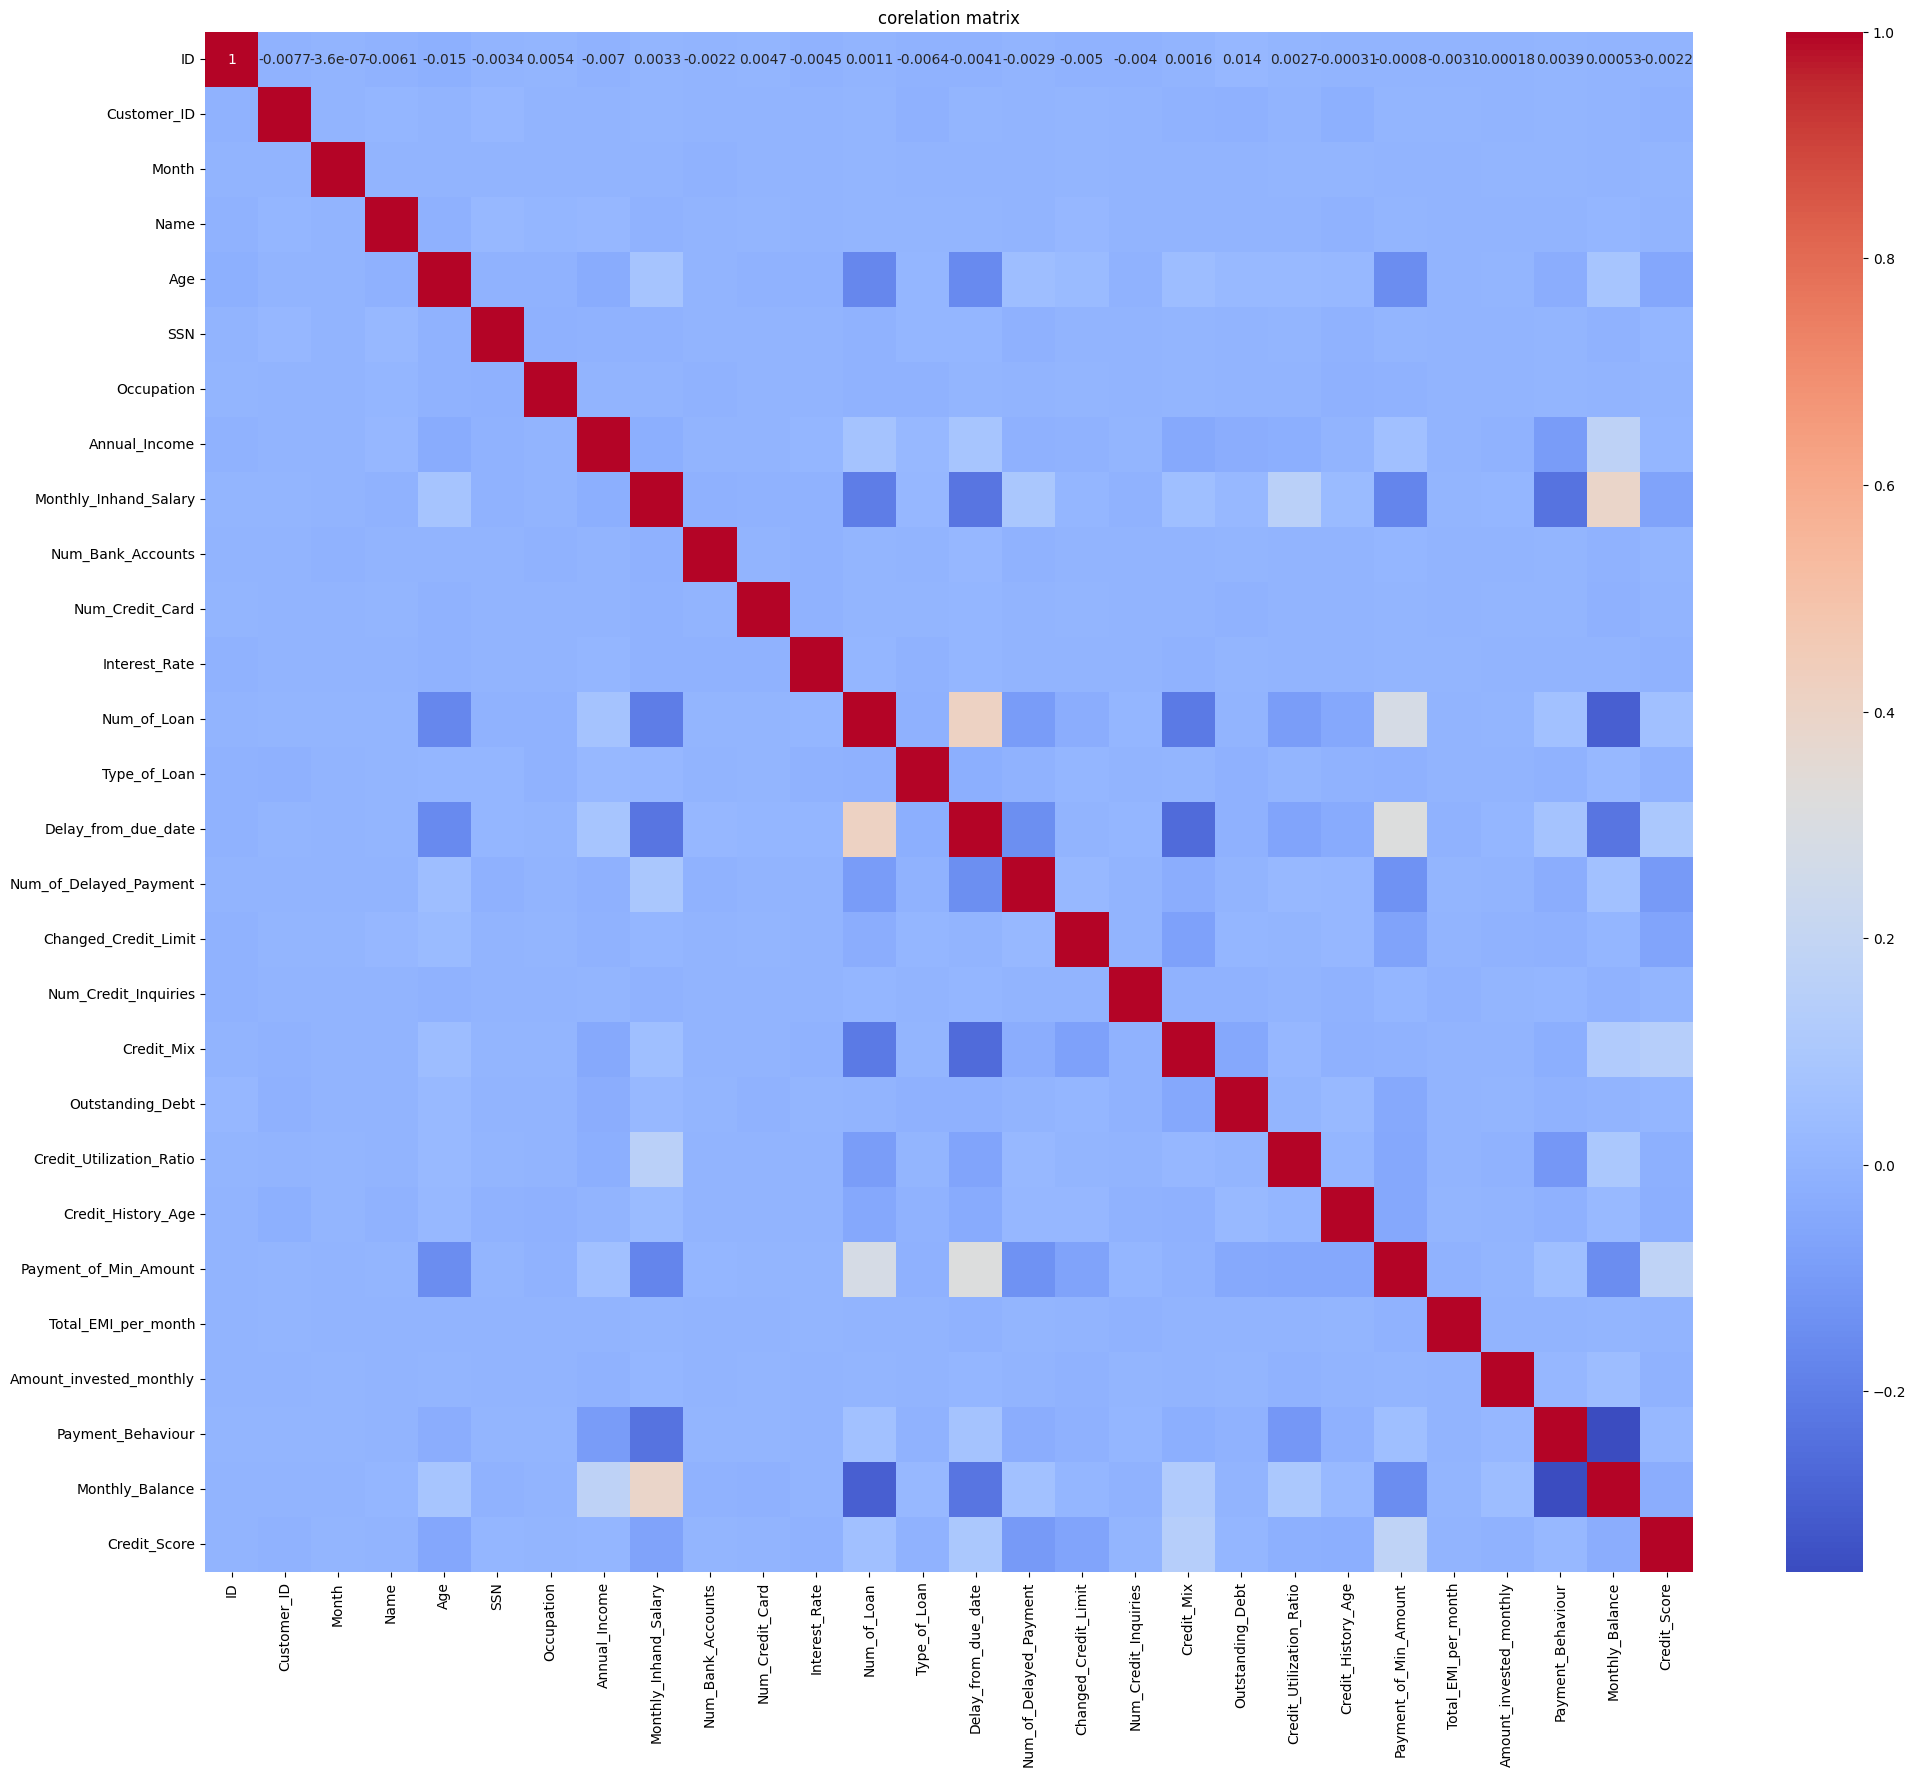

Relevant features: Index(['Credit_Score'], dtype='object')


In [10]:
# Compute correlation matrix
corr_matrix = data_train.corr()

# Plot heatmap
plt.figure(figsize =(24,20))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm')
plt.title('corelation matrix')
plt.show()


#Selecting features highly correlated with the target
thershold = 0.5
target_corr = corr_matrix['Credit_Score']
releavent_features = target_corr[abs(target_corr) > thershold].index
print("Relevant features:", releavent_features)

Trying training more than one classification model using “train.csv” and
 performing hyperparameter tuning.

In [11]:
x = data_train[['Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card' ,'Interest_Rate','Type_of_Loan' ,
                        'Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_Utilization_Ratio',
                        'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']] 

y = data_train['Credit_Score']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
75220,1.479222e+00,-0.137059,-0.150898,-0.151078,3461,-0.475691,671,-0.124193,2.031716,-0.152955,6152,95710
48955,1.870670e+00,-0.102988,-0.166395,-0.133927,981,-0.610280,9,-0.145106,1.525483,-0.126355,23028,89770
44966,-6.884483e-01,-0.102988,-0.119904,-0.138214,5746,0.466434,705,-0.124193,-1.695825,-0.136630,91048,16010
13568,-7.963156e-01,-0.085953,-0.119904,-0.136070,2982,-0.341102,62,-0.129421,-1.014488,-0.161893,2298,34606
92727,-7.666429e-01,-0.128541,-0.150898,-0.136070,0,-1.283226,732,-0.139878,-1.188257,-0.166978,73952,56913
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8.781773e-01,-0.102988,-0.135401,-0.148934,3747,-0.610280,732,-0.139878,0.556176,-0.147216,57668,43887
54886,-9.436470e-01,-0.094471,-0.096658,-0.121063,683,2.687156,117,0.000000,0.251543,-0.166531,4502,38800
76820,5.370578e-01,-0.120024,-0.127653,8.399150,5860,-0.879459,29,-0.124193,1.113529,-0.147857,51458,43997
860,-7.799299e-01,-0.137059,-0.119904,-0.148934,1635,-0.610280,732,-0.134649,0.887546,-0.164207,23822,18714


In [12]:

# Define models and their hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "penalty": ["l1", "l2", "elasticnet", "none"],
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"]  # Use solvers compatible with penalties
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    }
}


In [13]:
# Store best models and their results
best_models = {}
evaluation_results = {}

for name, config in param_grids.items():
    print(f"Tuning hyperparameters for {name}...")
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=3,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit GridSearchCV
    grid_search.fit(x_train, y_train)
    
    # Store the best model
    best_models[name] = grid_search.best_estimator_
    
    # Evaluate the best model on testing data
    y_test_pred = grid_search.best_estimator_.predict(x_test)
    evaluation_results[name] = {
        "Best Parameters": grid_search.best_params_,
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision": precision_score(y_test, y_test_pred, average='weighted'),
        "Test Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "Test F1-Score": f1_score(y_test, y_test_pred, average='weighted')
    }

Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\aliaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aliaa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aliaa\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

Tuning hyperparameters for Decision Tree...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


 Evaluating models on training and testing data by providing classification
 scores like accuracy, precision, recall ,f1-score, etc.. (provide your comments
 about results)

In [14]:
# Print evaluation results for all models
for name, results in evaluation_results.items():
    print(f"--- {name} ---")
    print(f"Best Parameters: {results['Best Parameters']}")
    print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
    print(f"Test Precision: {results['Test Precision']:.4f}")
    print(f"Test Recall: {results['Test Recall']:.4f}")
    print(f"Test F1-Score: {results['Test F1-Score']:.4f}")
    print("\n")

--- Logistic Regression ---
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.5730
Test Precision: 0.5740
Test Recall: 0.5730
Test F1-Score: 0.5067


--- Decision Tree ---
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.6637
Test Precision: 0.6617
Test Recall: 0.6637
Test F1-Score: 0.6616


--- Random Forest ---
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7583
Test Precision: 0.7575
Test Recall: 0.7583
Test F1-Score: 0.7572




In [16]:
# Save the best model 
joblib.dump(best_models["Random Forest"], "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl
